In [1]:
from main import *

RDKit WARNING: [10:33:16] Enabling RDKit 2019.09.1 jupyter extensions


In [2]:
LS = load_from_csv("data/training_set.csv")
TS = load_from_csv("data/test_set.csv")

# Create fingerprint features and output
with measure_time("Creating fingerprint"):
    X_LS = create_fingerprints(LS["SMILES"].values)
y_LS = LS["ACTIVE"].values
with measure_time("Creating fingerprint"):
    X_TS = create_fingerprints(TS["SMILES"].values)

Creating fingerprint...
Duration of [Creating fingerprint]: 0:00:15.584656
Creating fingerprint...
Duration of [Creating fingerprint]: 0:00:09.314573


In [3]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.over_sampling import SMOTE
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from keras.datasets import imdb
from keras.preprocessing import sequence
from sequence_classifiers import CNNSequenceClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
#from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import GradientBoostingClassifier

#classifier = SVC(C=1, gamma=0.5,kernel='rbf', probability=True)
#classifier = SVC(probability=True)
#classifier = AdaBoostClassifier(n_estimators=500)
#classifier = RandomForestClassifier(n_estimators=500, max_features=24)
#classifier = GradientBoostingClassifier(n_estimators=500)
classifier = MLPClassifier(activation='tanh', hidden_layer_sizes=(10,10))
#classifier = KNeighborsClassifier(11)
#classifier = CNNSequenceClassifier()
#classifier = GradientBoostingClassifier()

#X_LS, y_LS = shuffle(X_LS, y_LS)

Using TensorFlow backend.


[15504, 434]


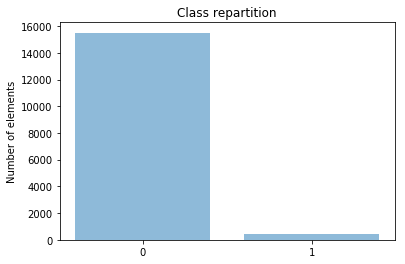

In [6]:
import matplotlib.pyplot as plt

classes = [0, 1]
y_pos = np.arange(len(classes))
number_elements = [np.size(np.where(y_LS == 0)), np.size(np.where(y_LS == 1))]
print(number_elements)
plt.bar(y_pos, number_elements, align='center', alpha=0.5)
plt.xticks(y_pos, classes)
plt.ylabel('Number of elements')
plt.title('Class repartition')

plt.show()

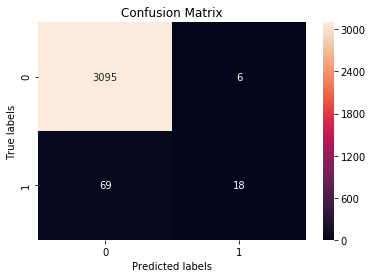

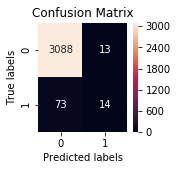

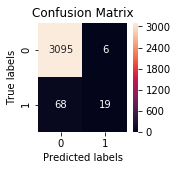

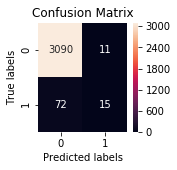

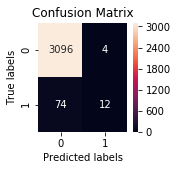

<Figure size 144x144 with 0 Axes>

In [13]:
cv = StratifiedKFold(n_splits=5)
for train, test in cv.split(X_LS, y_LS):
    smote = SMOTE(sampling_strategy='minority')
    X_sm, y_sm = smote.fit_sample(X_LS[train], y_LS[train])
    #X_sm, y_sm = shuffle(X_sm, y_sm)
    fit = classifier.fit(X_sm, y_sm)
    #probas_ = fit.predict_proba(X_LS[test])
    y_predict = fit.predict(X_LS[test])
    plot_confusion_matrix(y_LS[test] ,y_predict)

0.7227219992067816
0.7008084155278054


C:\Users\robin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.7199105220043961
0.6739390704518751
0.7068867216804202


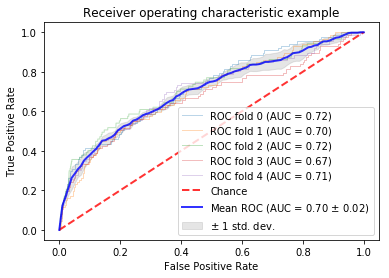

In [4]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import RandomUnderSampler
# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=5, shuffle=True)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
for train, test in cv.split(X_LS, y_LS):
    smote = SMOTE(sampling_strategy='minority')
    #smote = RandomOverSampler()
    X_sm, y_sm = smote.fit_resample(X_LS[train], y_LS[train])
    fit = classifier.fit(X_sm, y_sm)
    #fit = classifier.fit(X_LS[train], y_LS[train])
    probas_ = fit.predict_proba(X_LS[test])
    # Compute ROC curve and area the curve
    print(roc_auc_score(y_LS[test], probas_[:, 1]))
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_LS[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
#svc gamma = 0.05 C =1 auc = 77 +-2
#svc gamma = 0.1 C =1 auc = 79 +-2
#svc gamma = 0.1 C =0.5 auc = 78 +-2
#svc gamma = 0.1 C =1.5 auc = 78 +-3
#svc gamma = 0.1 C =2 auc = 77 +-3
#svc gamma = 0.2 C =1 auc = 78 +-3

In [4]:
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from imblearn.under_sampling import CondensedNearestNeighbour
#model = RandomForestClassifier(n_estimators=1000)
#smote = CondensedNearestNeighbour()
#X_sm, y_sm = smote.fit_resample(X_LS, y_LS)
classifier = classifier.fit(X_LS, y_LS)
print(len(y_LS))

15938


In [5]:
y_predict = classifier.predict_proba(X_TS)[:,1]
make_submission(y_predict, 0.79, 'submission_SVC gamma = 0.1 C = 1 features 124 auc predicted 0.79')

'submission_SVC gamma = 0.1 C = 1 features 124 auc predicted 0.79_04-12-2019_17h14.txt'